In [2]:
import csv
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import statistics
import math
from sklearn.metrics import r2_score
# from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('data2020.csv', usecols=["Tanggal", "Daging Ayam"])
df

,Tanggal,Daging Ayam
0,6/1/2020,34200
1,7/1/2020,34000
2,8/1/2020,33950
3,9/1/2020,33850
4,10/1/2020,34050
...,...,...
401,3/9/2021,32500
402,6/9/2021,31750
403,7/9/2021,31500
404,8/9/2021,31450


<AxesSubplot:xlabel='Tanggal'>

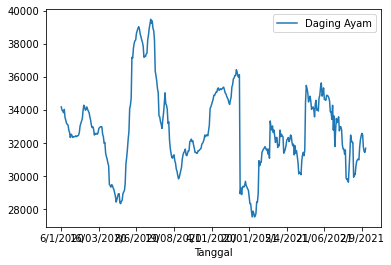

In [4]:
df.plot(x='Tanggal', y='Daging Ayam')

# Augmentasi

In [5]:
# das=np.std(df['Daging Ayam'])
# das

In [147]:
# generate = []
# for i in range(5):
#     for x in df.iterrows():
#         generate.append(np.random.uniform(das))

In [148]:
# print(len(generate))

In [149]:
# df = pd.DataFrame(generate)
# df
# # df.to_csv('newww.csv')

# Normalisasi

In [150]:
# minm=min(df)
# maxm=max(df)
# df1 = df.apply(lambda x:(x-minm)/(maxm-minm))
# df1.shape

In [6]:
minm=min(df['Daging Ayam'])
maxm=max(df['Daging Ayam'])
df1 = df['Daging Ayam'].apply(lambda x:(x-minm)/(maxm-minm))
df1

0      0.556485
1      0.539749
2      0.535565
3      0.527197
4      0.543933
         ...   
401    0.414226
402    0.351464
403    0.330544
404    0.326360
405    0.347280
Name: Daging Ayam, Length: 406, dtype: float64

# Normal Distribution

In [7]:
mean = np.mean(df["Daging Ayam"])
print(mean)

32802.463054187196


In [8]:
median = np.median(df["Daging Ayam"])
print(median)

32500.0


In [9]:
standardev = np.std(df["Daging Ayam"])
print(standardev)

2497.9782647566385


In [10]:
def normal_distribution(x, mean, standardev):
    prob = 1/(2*(np.pi)*standardev) * np.exp(-0.5*((x-mean)/standardev)**2)
    return prob

pdf = normal_distribution(df["Daging Ayam"], mean, standardev)

Text(0, 0.5, 'probability density')

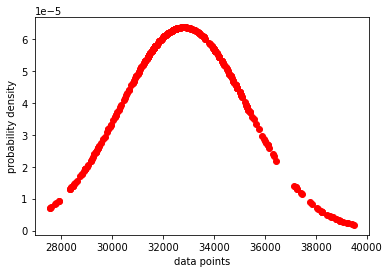

In [11]:
plt.scatter(df["Daging Ayam"], pdf, color='red')
plt.xlabel('data points')
plt.ylabel('probability density')

In [12]:
print(min(df['Daging Ayam']))
print(df['Daging Ayam'])

27550
0      34200
1      34000
2      33950
3      33850
4      34050
       ...  
401    32500
402    31750
403    31500
404    31450
405    31700
Name: Daging Ayam, Length: 406, dtype: int64


In [14]:
df2 = np.array(df1).reshape(-1,1)
df2.shape

(406, 1)

# eksperimen

In [14]:
x=df2
no=len(x)
print(len(x))
timestepss=10
exsam=[]
yesam=[]
for i in range(timestepss, no, 1):
    xsam=x[i-timestepss:i]
    ysam=x[i]
    exsam.append(xsam)
    yesam.append(ysam)

406


In [13]:
xdata=np.array(exsam)
xdata=xdata.reshape(xdata.shape[0],xdata.shape[1],1)
print(xdata.shape)
# print(xdata)

(396, 10, 1)


In [14]:
ydata=np.array(yesam)
ydata=ydata.reshape(ydata.shape[0],1)
print(ydata.shape)
# print(ydata)

(396, 1)


In [15]:
testing=71
xtr=xdata[:-testing]
xts=xdata[-testing:]
ytr=ydata[:-testing]
yts=ydata[-testing:]

In [16]:
print(xtr.shape)
print(ytr.shape)
print(xts.shape)
print(yts.shape)

(325, 10, 1)
(325, 1)
(71, 10, 1)
(71, 1)


In [17]:
for inp, out in zip(xtr[0:2],ytr[0:2]):
    print(inp,'---',out)

[[0.55648536]
 [0.53974895]
 [0.53556485]
 [0.52719665]
 [0.54393305]
 [0.50209205]
 [0.48953975]
 [0.47280335]
 [0.46861925]
 [0.46443515]] --- [0.43933054]
[[0.53974895]
 [0.53556485]
 [0.52719665]
 [0.54393305]
 [0.50209205]
 [0.48953975]
 [0.47280335]
 [0.46861925]
 [0.46443515]
 [0.43933054]] --- [0.42677824]


# split data

In [15]:
train = int(len(df2)*0.80)
test = len(df2)-train
data_train = df2[0:train, :]
data_test = df2[train:len(df2), :1]

In [16]:
print(data_train)
print(data_test.shape)

[[0.55648536]
 [0.53974895]
 [0.53556485]
 [0.52719665]
 [0.54393305]
 [0.50209205]
 [0.48953975]
 [0.47280335]
 [0.46861925]
 [0.46443515]
 [0.43933054]
 [0.42677824]
 [0.40167364]
 [0.41841004]
 [0.41422594]
 [0.40167364]
 [0.40585774]
 [0.40585774]
 [0.40585774]
 [0.41004184]
 [0.40585774]
 [0.41004184]
 [0.41004184]
 [0.41422594]
 [0.42677824]
 [0.46025105]
 [0.47280335]
 [0.48535565]
 [0.49790795]
 [0.53974895]
 [0.56485356]
 [0.55648536]
 [0.53974895]
 [0.54393305]
 [0.55648536]
 [0.54393305]
 [0.53556485]
 [0.52719665]
 [0.50627615]
 [0.48953975]
 [0.46443515]
 [0.45188285]
 [0.45606695]
 [0.44351464]
 [0.41422594]
 [0.42259414]
 [0.41841004]
 [0.42259414]
 [0.41841004]
 [0.42677824]
 [0.44769874]
 [0.45188285]
 [0.45606695]
 [0.45606695]
 [0.45606695]
 [0.41841004]
 [0.40585774]
 [0.37238494]
 [0.37656904]
 [0.32217573]
 [0.30543933]
 [0.29288703]
 [0.27196653]
 [0.25941423]
 [0.16317992]
 [0.15899582]
 [0.15062762]
 [0.16317992]
 [0.15899582]
 [0.14644351]
 [0.13807531]
 [0.12

# Timestep

In [17]:
def data(datadg, time_step):
    X = []
    Y = []
    for i in range(len(datadg)-time_step-1):
        X.append(datadg[i:(i+time_step),0])
        Y.append(datadg[i+time_step, 0])
    return np.array(X), np.array(Y)

In [18]:
a=[]
time=10
nextday=5
for i in range(len(x)-time-1):
    aa=x[i:(i+time)]
    a.append(aa)

In [22]:
xa=np.array(aa)
print(xa.shape)

(10, 1)


In [23]:
print(xa)

[[0.28870293]
 [0.29288703]
 [0.28870293]
 [0.35146444]
 [0.38912134]
 [0.41004184]
 [0.42259414]
 [0.41422594]
 [0.35146444]
 [0.33054393]]


In [24]:
b=[]
time=10
day=5
for i in range(len(x)-time-1):
    bb=x[(i+time):(i+time+day)]
    b.append(bb)

In [25]:
xb=np.array(bb)
print(xb.shape)
print(xb)

(2, 1)
[[0.32635983]
 [0.34728033]]


In [25]:
time_step = 7
x_train, y_train = data(data_train, time_step)
x_test, y_test = data(data_test, time_step)

In [26]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(316, 7)
(316,)
(74, 7)
(74,)


# Training LSTM

In [27]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
x_train.shape

(316, 7, 1)

In [29]:
for inp2, out2 in zip(x_train[0:2],y_train[0:2]):
    print(inp2,'---',out2)

[[0.55648536]
 [0.53974895]
 [0.53556485]
 [0.52719665]
 [0.54393305]
 [0.50209205]
 [0.48953975]
 [0.47280335]
 [0.46861925]
 [0.46443515]] --- 0.4393305439330544
[[0.53974895]
 [0.53556485]
 [0.52719665]
 [0.54393305]
 [0.50209205]
 [0.48953975]
 [0.47280335]
 [0.46861925]
 [0.46443515]
 [0.43933054]] --- 0.42677824267782427


In [28]:
print(x_train.shape[1])
print(x_train.shape[2])

7
1


In [29]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)

In [30]:
model = keras.Sequential()
model.add(layers.LSTM(50, input_shape=(7,1)))
# model.add(layers.LSTM(50, return_sequences=False))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(x_train, y_train, batch_size=4, epochs=100)

Epoch 1/100
79/79 [==============================] - 41s 13ms/step - loss: 0.0170 - accuracy: 0.0095
Epoch 2/100
79/79 [==============================] - 1s 8ms/step - loss: 0.0060 - accuracy: 0.0095
Epoch 3/100
79/79 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.0095
Epoch 4/100
79/79 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.0095
Epoch 5/100
79/79 [==============================] - 1s 8ms/step - loss: 0.0030 - accuracy: 0.0095
Epoch 6/100
79/79 [==============================] - 1s 13ms/step - loss: 0.0029 - accuracy: 0.0095 0s - loss: 0.0032 - accura
Epoch 7/100
79/79 [==============================] - 1s 12ms/step - loss: 0.0026 - accuracy: 0.0095
Epoch 8/100
79/79 [==============================] - 1s 13ms/step - loss: 0.0028 - accuracy: 0.0095
Epoch 9/100
79/79 [==============================] - 1s 11ms/step - loss: 0.0028 - accuracy: 0.0095
Epoch 10/100
79/79 [==============================] - 1s 12ms/step - loss: 

In [33]:
train_prediksi = model.predict(x_train)
test_prediksi = model.predict(x_test)

In [34]:
r2_score(y_train,train_prediksi)

0.9594611948915024

In [35]:
math.sqrt(mean_squared_error(y_train,train_prediksi))

0.045352687900219735

In [36]:
r2_score(y_test,test_prediksi)

0.8589480586162561

In [37]:
math.sqrt(mean_squared_error(y_test,test_prediksi))

0.05165817561231287

In [38]:
print(train_prediksi)

[[0.4780733 ]
 [0.4593462 ]
 [0.45582977]
 [0.45673785]
 [0.4364908 ]
 [0.418967  ]
 [0.3941853 ]
 [0.4074531 ]
 [0.41374412]
 [0.4043706 ]
 [0.40461898]
 [0.40604344]
 [0.40722412]
 [0.41208076]
 [0.40902784]
 [0.41126326]
 [0.41222805]
 [0.41621065]
 [0.429185  ]
 [0.46458346]
 [0.48530945]
 [0.49666432]
 [0.50512904]
 [0.54283196]
 [0.576154  ]
 [0.5708105 ]
 [0.54209185]
 [0.53307074]
 [0.5459093 ]
 [0.5417653 ]
 [0.5307014 ]
 [0.51875365]
 [0.4973055 ]
 [0.4779627 ]
 [0.45309034]
 [0.4385236 ]
 [0.44453657]
 [0.4398848 ]
 [0.41193715]
 [0.41287267]
 [0.41443995]
 [0.42163742]
 [0.4207527 ]
 [0.4274179 ]
 [0.44933322]
 [0.45956826]
 [0.46234515]
 [0.45947957]
 [0.45641258]
 [0.41929775]
 [0.39636478]
 [0.36364144]
 [0.36458114]
 [0.32022765]
 [0.29591456]
 [0.28489107]
 [0.2692817 ]
 [0.25858817]
 [0.16390683]
 [0.14826827]
 [0.14500397]
 [0.1696597 ]
 [0.17384253]
 [0.1630535 ]
 [0.1503238 ]
 [0.13143557]
 [0.11421612]
 [0.08327702]
 [0.09935701]
 [0.11843503]
 [0.14114235]
 [0.14

In [176]:
# print(len(train_prediksi))
# print(min(train_prJediksi))
# print(max(train_prediksi))
print(train_prediksi.shape)
# print(test_prediksi.shape)
# print(y_test.shape)

(288, 1)


# Denormalisasi

In [177]:
flat = train_prediksi.flatten()
print(flat.shape)

(288,)


In [178]:
# print(flat)

In [179]:
def denorm1(abc):
    p=[]
    for i in flat:
        u=np.array((i)*(maxm-minm)+minm)
        p.append([u])
    return(np.array(p))

In [180]:
trt=denorm1(flat).flatten()

In [181]:
print(trt.shape)

(288,)


In [182]:
# print(trt)

In [183]:
print(test_prediksi.shape)
test1d = test_prediksi.flatten()
print(test1d.shape)

(46, 1)
(46,)


In [184]:
def denorm(dfg):
    c=[]
    for i in test1d:
        b=np.array((i)*(maxm-minm)+minm)
        c.append([b])
    return(np.array(c))

In [185]:
tst=denorm(test1d).flatten()
# print(tst)

In [186]:
print(tst.shape)

(46,)


In [187]:
trt1 = np.array(trt)
tst1 = np.array(tst)
prediction = np.concatenate((trt1, tst1))
# print(prediction)

# Ploting actual value vs predict value

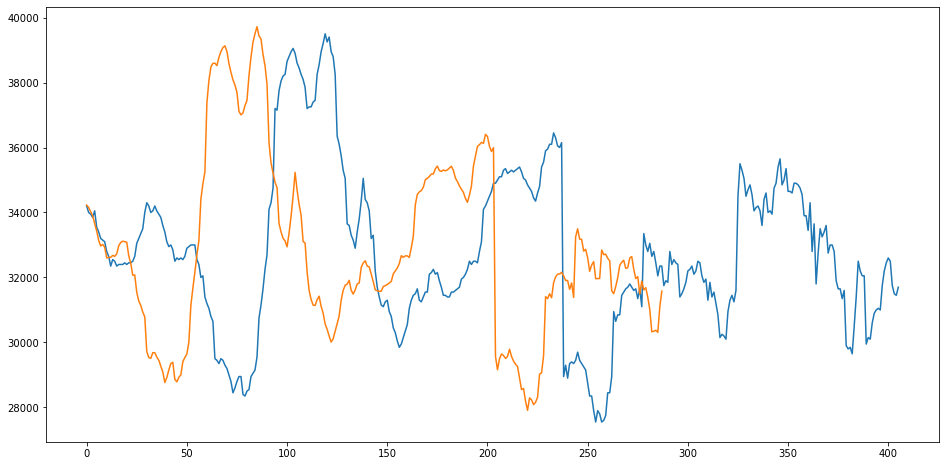

In [188]:
plt.figure(figsize=(16,8))
plt.plot(df['Daging Ayam'])
plt.plot(trt)
plt.show()

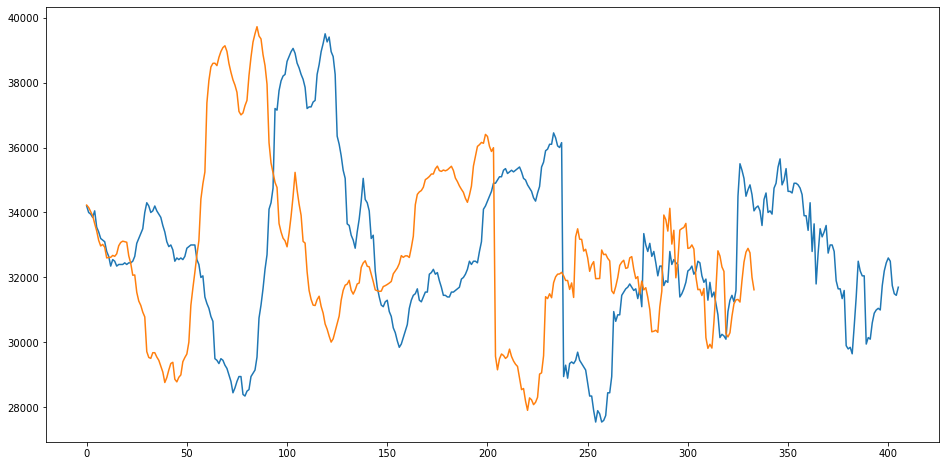

In [189]:
plt.figure(figsize=(16,8))
plt.plot(df['Daging Ayam'])
plt.plot(prediction)
plt.show()

In [190]:
# df5=df["Daging Ayam"]
# df5.shape

In [191]:
# import numpy
# ts=21
# # shift train
# trainplot=numpy.empty_like(df5)
# trainplot[:, :]=numpy.nan
# trainplot[ts:len(trt)+ts, : ]=trt

# # shift test
# testplot=numpy.empty_like(df5)
# testplot[:, :]=numpy.nan
# testplot[len(trt)+(ts*2)+1:len(df5)-1]=tst

# plt.plot(df5)
# plt.plot(trainplot)
# plt.plot(testplot)
# plt.show()

# Predicting the next 100 day

In [192]:
# print(data_test)
# print(len(data_test))

In [193]:
# x_input = data_test[75:].reshape(1,-1)
# x_input.shape

In [194]:
# inputx=list(x_input)
# inputx

In [195]:
# inputx=inputx[0].tolist()
# inputx

In [196]:
# from numpy import array
# lst_output=[]
# timesteps=7
# i=0
# while(i<10):
#     if(len(inputx)>7):
#         x_input=np.array(inputx[1:])
#         print("{} day input {}".format(i,x_input))
#         x_input=x_input.reshape(1,-1)
#         x_input=x_input.reshape((1, timesteps, 1))
#         #print(x_input)
#         yhat=model.predict(x_input, verbose=0)
#         print("{} day output {}".format(i,yhat))
#         inputx.extend(yhat[0].tolist())
#         inputx=inputx[1:]
#         #print(x_input)
#         lst_output.extend(yhat.tolist())
#         i=i+1
#     else:
#         x_input=x_input.reshape((1,timesteps,1))
#         yhat=model.predict(x_input, verbose=0)
#         print(yhat[0])
#         inputx.extend(yhat[0].tolist())
#         print(len(inputx))
#         lst_output.extend(yhat.tolist())
#         i=i+1
# print(lst_output)

In [197]:
# newday=np.arange(1,8)
# prediksiday=np.arange(8,61)

In [198]:
# len(df5)

In [199]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler(feature_range=(0,1))
# df5=scaler.fit_transform(np.array(df5).reshape(-1,1))

In [200]:
# plt.plot(newday,scaler.inverse_transform(df2[309:]))
# plt.plot(prediksiday,scaler.inverse_transform(lst_output))

In [201]:
# dff=df5.tolist()
# dff.extend(lst_output)
# plt.plot(df5[300:])

In [202]:
# dff=scaler.inverse_transform(df5).tolist()

In [203]:
# plt.plot(dff)